In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/solar-panel-images/Faulty_solar_panel',
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/kaggle/input/solar-panel-images/Faulty_solar_panel',
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

class_names = train_ds.class_names
print(class_names)
train_ds
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

NotFoundError: Could not find directory /kaggle/input/solar-panel-images/Faulty_solar_panel

In [ ]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from cv2 import resize
from glob import glob
from tqdm import tqdm

import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)


from cv2 import resize
from glob import glob
import kagglehub
import warnings
warnings.filterwarnings("ignore")



# Download latest version
path = kagglehub.dataset_download("pythonafroz/solar-panel-images")

print("Path to dataset files:", path)

img_height = 244
img_width = 244

train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

class_names = train_ds.class_names
print(class_names)
train_ds
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()


plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 244, 244, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 244, 244, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 244, 244, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 90)             │         46,170 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,760,858 (56.31 MB)

 Trainable params: 46,170 (180.35 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

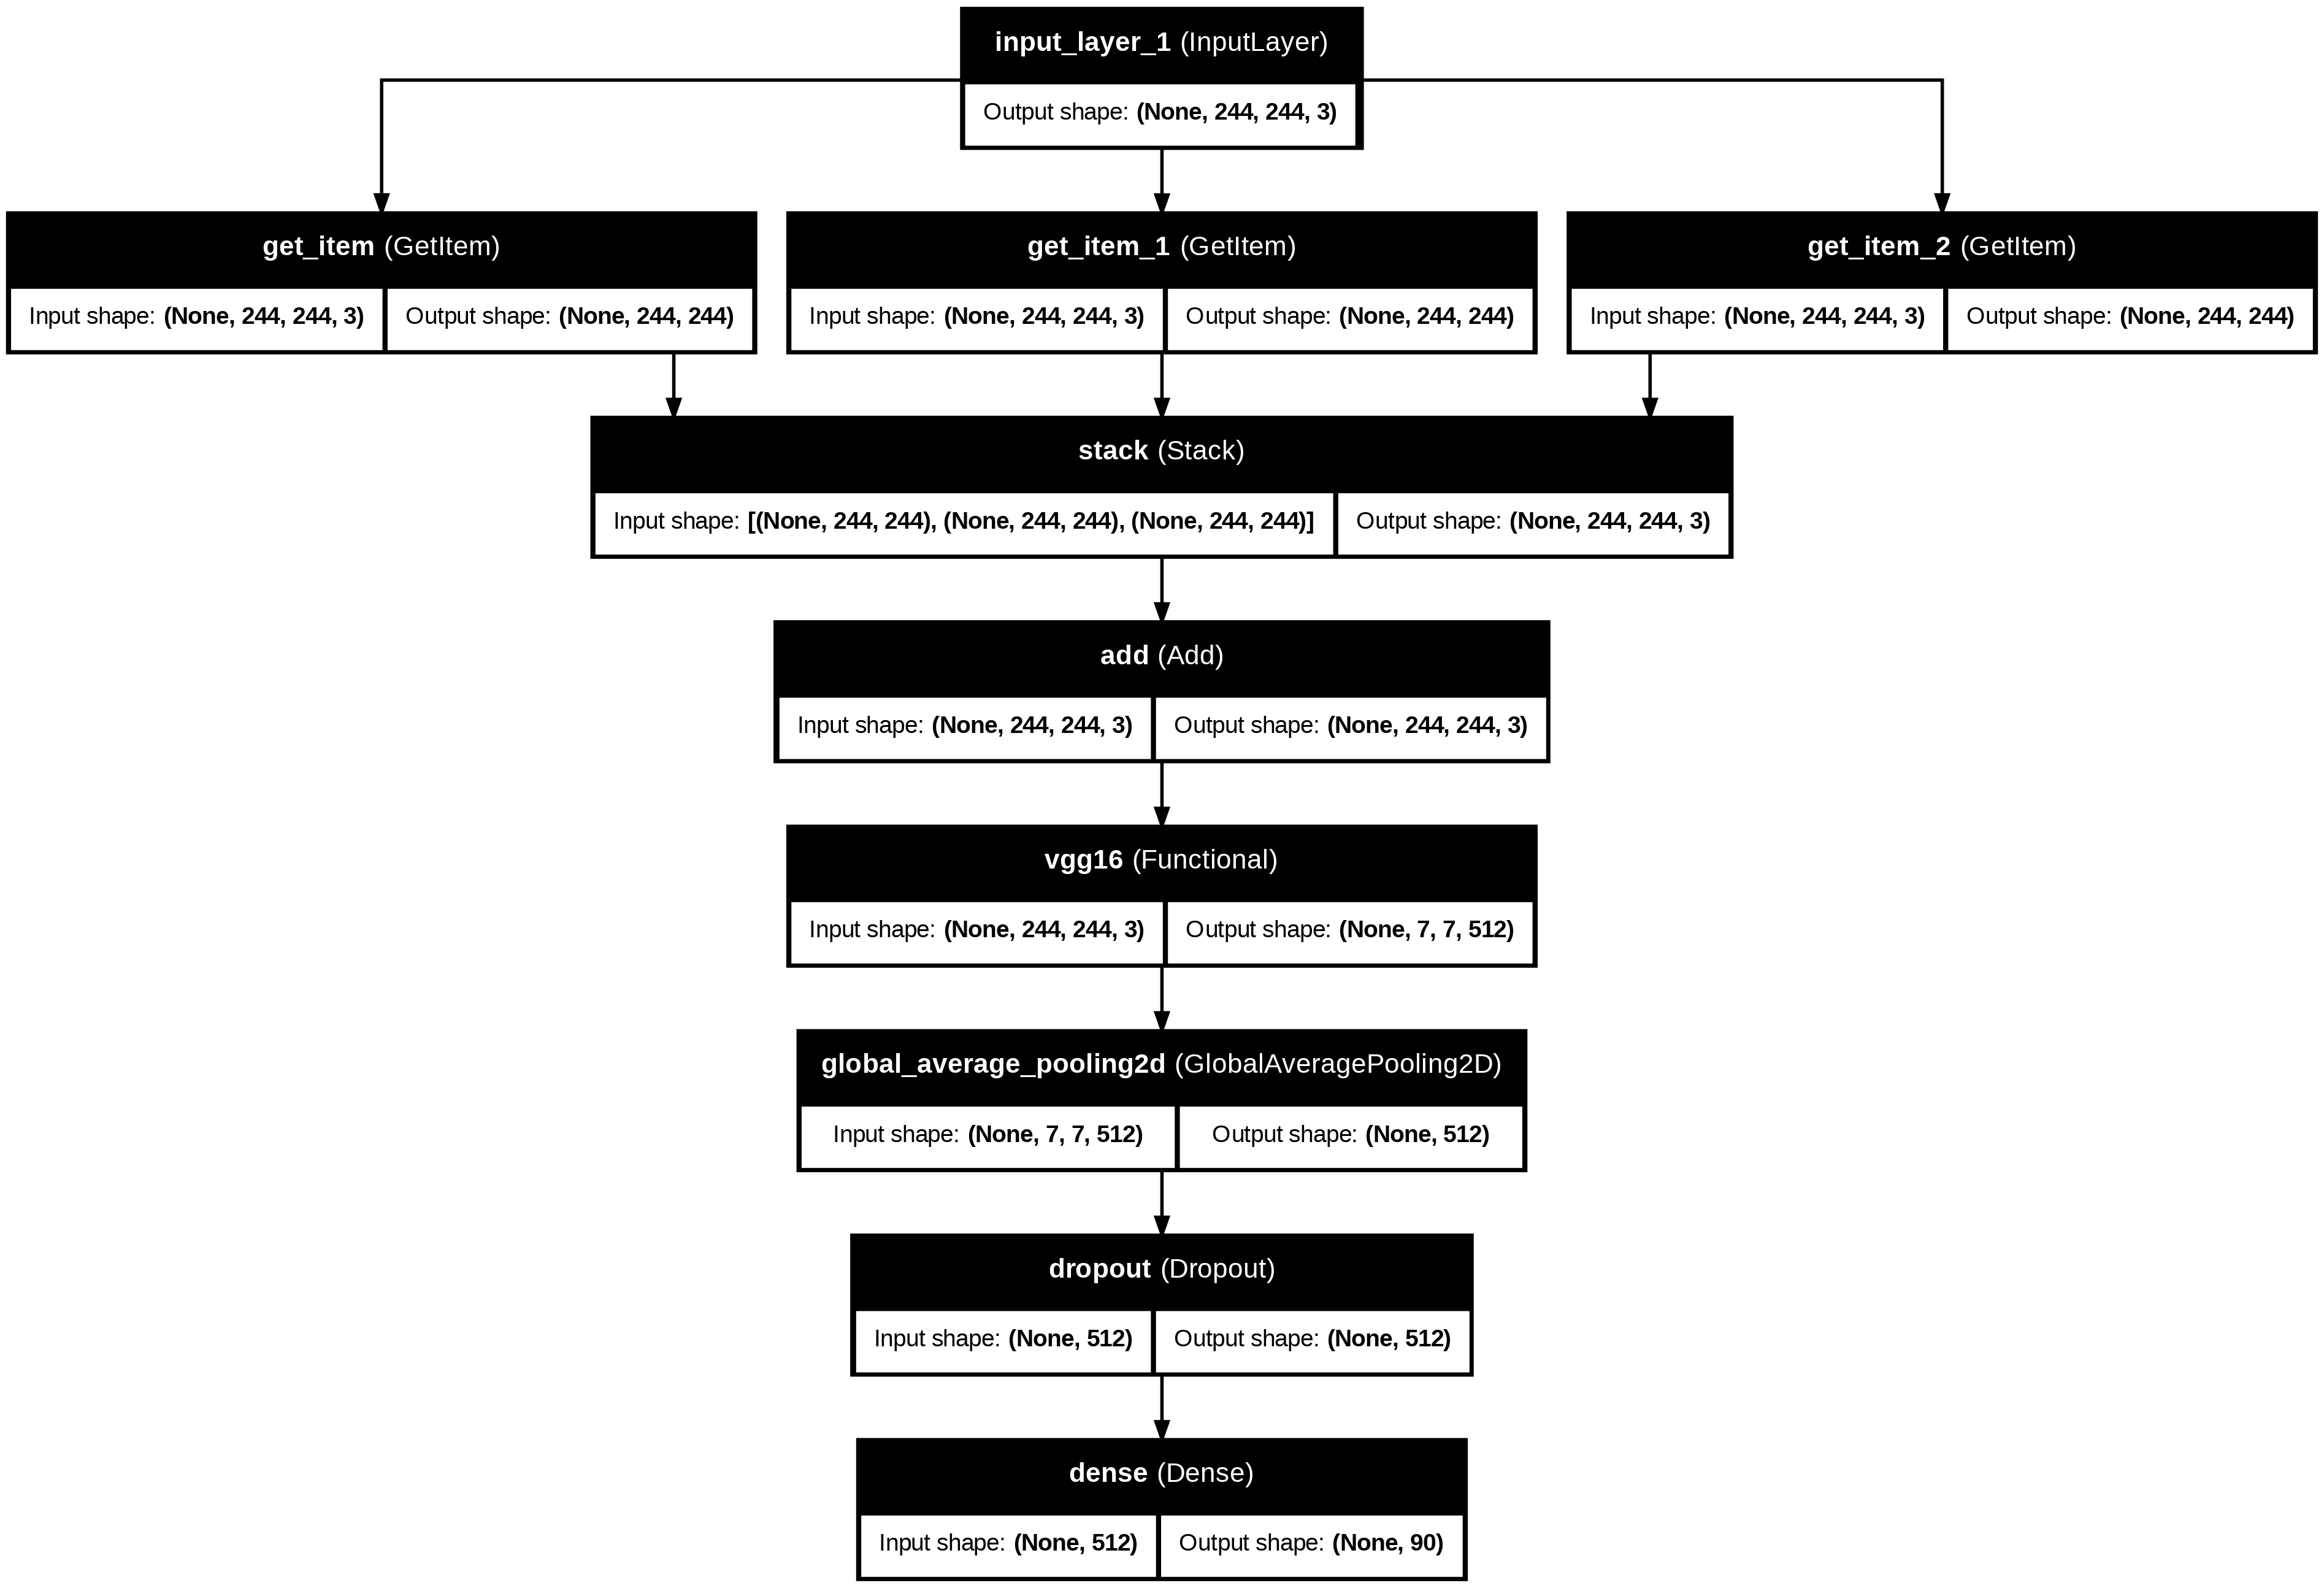

In [ ]:
!pip install pydot
!pip install graphviz




In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epoch = 15
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)


Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 609s 27s/step - accuracy: 0.1452 - loss: 12.3036 - val_accuracy: 0.9322 - val_loss: 0.1555
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 619s 27s/step - accuracy: 0.9278 - loss: 0.3341 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 591s 26s/step - accuracy: 0.9808 - loss: 0.0516 - val_accuracy: 1.0000 - val_loss: 5.6947e-04
Epoch 4/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 588s 24s/step - accuracy: 0.9862 - loss: 0.0455 - val_accuracy: 1.0000 - val_loss: 3.2879e-04
Epoch 5/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 586s 25s/step - accuracy: 0.9911 - loss: 0.0374 - val_accuracy: 1.0000 - val_loss: 2.0354e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [ ]:
# fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        )
    ]
)

get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.figure()
plt.show()


loss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})

        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 244, 244, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 244, 244)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 244, 244, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 244, 244, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 512)            │              0 │ vgg16[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 512)            │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 90)             │         46,170 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,853,200 (56.66 MB)

 Trainable params: 7,125,594 (27.18 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 92,342 (360.71 KB)

Epoch 1/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 676s 29s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 679s 29s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/15
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 1.0000 - loss: 0.0000e+00 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch

# Download dataset
path = kagglehub.dataset_download("pythonafroz/solar-panel-images")
print("Path to dataset files:", path)

# Set image dimensions
img_height, img_width = 224, 224  # CLIP expects 224x224 images

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='training',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='validation',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

class_names = train_ds.class_names

# Function to predict using CLIP
def predict_clip(image_batch):
    images = [Image.fromarray(img.numpy().astype("uint8")) for img in image_batch]
    inputs = processor(images=images, return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model.get_image_features(**inputs)

    # Get text features for class names
    text_inputs = processor(text=class_names, return_tensors="pt", padding=True)
    text_outputs = model.get_text_features(**text_inputs)

    # Calculate similarity
    similarity = outputs @ text_outputs.T
    return similarity.softmax(dim=-1)

# Evaluate model
correct = 0
total = 0

for images, labels in val_ds:
    predictions = predict_clip(images)
    predicted_classes = predictions.argmax(dim=-1).numpy()
    correct += (predicted_classes == labels.numpy()).sum()
    total += len(labels)

accuracy = correct / total
print(f"Validation accuracy: {accuracy:.2f}")

# Show predictions
plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    predictions = predict_clip(images)
    predicted_classes = predictions.argmax(dim=-1).numpy()

    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        color = 'green' if labels[i] == predicted_classes[i] else 'red'
        plt.title(f"Actual: {class_names[labels[i]]}")
        plt.ylabel(f"Predicted: {class_names[predicted_classes[i]]}", fontdict={'color': color})
        plt.gca().axes.set_xticklabels([])
        plt.gca().axes.set_yticklabels([])

plt.show()


Exception ignored in: <function _xla_gc_callback at 0x7ccdb9a92c00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


100%|██████████| 305M/305M [00:03<00:00, 90.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/pythonafroz/solar-panel-images/versions/2


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Found 885 files belonging to 1 classes.
Using 708 files for training.
Found 885 files belonging to 1 classes.
Using 177 files for validation.


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch

# Download dataset
path = '/content/a/Faulty_solar_panel/'

# Set image dimensions
img_height, img_width = 224, 224  # CLIP expects 224x224 images

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='training',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='validation',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

class_names = train_ds.class_names

# Update the model architecture
def create_model(num_classes):
    base_model = tf.keras.applications.VGG19(
        include_top=False,
        weights='imagenet',
        input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(img_height, img_width, 3))
    x = tf.keras.applications.vgg19.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes)(x)
    return tf.keras.Model(inputs, outputs)

# Create and compile the model
num_classes = len(class_names)
model = create_model(num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
epochs = 20
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-2,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Test accuracy: {test_accuracy:.2f}")

# Function to plot images with predictions
def plot_images_with_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_class = np.argmax(predictions[i])
            actual_class = labels[i].numpy()

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {class_names[actual_class]}\nPredicted: {class_names[predicted_class]}",
                      color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot images with predictions
plot_images_with_predictions(val_ds)

# Generate classification report
y_true = []
y_pred = []
for images, labels in val_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 636s 28s/step - accuracy: 0.2904 - loss: 6.6020 - val_accuracy: 0.6158 - val_loss: 1.8433
Epoch 2/20
11/23 ━━━━━━━━━━━━━━━━━━━━ 4:28 22s/step - accuracy: 0.6164 - loss: 2.2298

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Set image dimensions
img_height = 244
img_width = 244

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel/',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

class_names = train_ds.class_names
print(f"Classes: {class_names}")

# Data preprocessing
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model
def create_model(num_classes):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(img_height, img_width, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes)
    ])
    return model

# Create and compile model
model = create_model(len(class_names))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Function to plot predictions
def plot_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_class = np.argmax(predictions[i])
            actual_class = labels[i].numpy()

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {class_names[actual_class]}\nPred: {class_names[predicted_class]}",
                     color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Generate predictions and classification report
y_true = []
y_pred = []
for images, labels in val_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot sample predictions
plot_predictions(val_ds)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from zipfile import ZipFile
zf = ZipFile('archive (1).zip', 'r')
zf.extractall('a')
zf.close()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch

# Download dataset
path = '/content/a/Faulty_solar_panel/'

# Set image dimensions
img_height, img_width = 224, 224  # CLIP expects 224x224 images

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='training',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='validation',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

class_names = train_ds.class_names

# Update the model architecture
def create_model(num_classes):
    base_model = tf.keras.applications.VGG19(
        include_top=False,
        weights='imagenet',
        input_shape=(img_height, img_width, 3)
    )
    base_model.trainable = False

    inputs = tf.keras.Input(shape=(img_height, img_width, 3))
    x = tf.keras.applications.vgg19.preprocess_input(inputs)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes)(x)
    return tf.keras.Model(inputs, outputs)

# Create and compile the model
num_classes = len(class_names)
model = create_model(num_classes)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
epochs = 20
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-2,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_ds)
print(f"Test accuracy: {test_accuracy:.2f}")

# Function to plot images with predictions
def plot_images_with_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_class = np.argmax(predictions[i])
            actual_class = labels[i].numpy()

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {class_names[actual_class]}\nPredicted: {class_names[predicted_class]}",
                      color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot images with predictions
plot_images_with_predictions(val_ds)

# Generate classification report
y_true = []
y_pred = []
for images, labels in val_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.
Epoch 1/20
 9/23 ━━━━━━━━━━━━━━━━━━━━ 5:50 25s/step - accuracy: 0.1760 - loss: 8.5510

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

# Set image dimensions
img_height = 244
img_width = 244

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel/',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

class_names = train_ds.class_names
print(f"Classes: {class_names}")

# Data preprocessing for MobileNetV2
AUTOTUNE = tf.data.AUTOTUNE
train_ds_mobile = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_mobile = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 1. MobileNetV2 Model
def create_mobilenet_model(num_classes):
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(img_height, img_width, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes)
    ])
    return model

# Create and compile MobileNetV2 model
mobile_model = create_mobilenet_model(len(class_names))
mobile_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 2. CLIP Model Setup
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Function to get CLIP predictions
def get_clip_predictions(images, class_names):
    images_pil = [Image.fromarray(img.numpy().astype('uint8')) for img in images]

    # Prepare text inputs for all classes
    text_inputs = clip_processor(
        text=class_names,
        return_tensors="pt",
        padding=True
    )

    # Prepare image inputs
    image_inputs = clip_processor(
        images=images_pil,
        return_tensors="pt",
        padding=True
    )

    # Get predictions
    with torch.no_grad():
        image_features = clip_model.get_image_features(**image_inputs)
        text_features = clip_model.get_text_features(**text_inputs)

        # Normalize features
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        # Calculate similarity
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    return similarity.numpy()

# Training MobileNetV2
print("Training MobileNetV2 Model...")
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history_mobile = mobile_model.fit(
    train_ds_mobile,
    validation_data=val_ds_mobile,
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate both models
def evaluate_both_models(val_ds, class_names):
    # Results storage
    y_true = []
    y_pred_mobile = []
    y_pred_clip = []

    for images, labels in val_ds:
        # MobileNetV2 predictions
        mobile_pred = mobile_model.predict(images)
        y_pred_mobile.extend(np.argmax(mobile_pred, axis=1))

        # CLIP predictions
        clip_pred = get_clip_predictions(images, class_names)
        y_pred_clip.extend(np.argmax(clip_pred, axis=1))

        y_true.extend(labels.numpy())

    return y_true, y_pred_mobile, y_pred_clip

# Get predictions and evaluate
y_true, y_pred_mobile, y_pred_clip = evaluate_both_models(val_ds, class_names)

# Print classification reports
print("\nMobileNetV2 Classification Report:")
print(classification_report(y_true, y_pred_mobile, target_names=class_names))

print("\nCLIP Classification Report:")
print(classification_report(y_true, y_pred_clip, target_names=class_names))

# Plotting functions
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('MobileNetV2 Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('MobileNetV2 Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_comparison_predictions(val_ds, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in val_ds.take(1):
        mobile_predictions = mobile_model.predict(images)
        clip_predictions = get_clip_predictions(images, class_names)

        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            mobile_pred = np.argmax(mobile_predictions[i])
            clip_pred = np.argmax(clip_predictions[i])
            actual_class = labels[i].numpy()

            mobile_correct = mobile_pred == actual_class
            clip_correct = clip_pred == actual_class

            title = f"Actual: {class_names[actual_class]}\n"
            title += f"MobileNet: {class_names[mobile_pred]} ({'✓' if mobile_correct else '✗'})\n"
            title += f"CLIP: {class_names[clip_pred]} ({'✓' if clip_correct else '✗'})"

            plt.title(title, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot results
plot_training_history(history_mobile)
plot_comparison_predictions(val_ds)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set image dimensions
img_height = 244
img_width = 244

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel/',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

# Function to convert multi-class labels to binary (Clean vs Not Clean)
def to_binary_labels(images, labels):
    binary_labels = tf.where(labels == 1, 0, 1)  # Assuming 'Clean' is label 1
    return images, binary_labels

# Apply binary conversion to datasets
train_ds_binary = train_ds.map(to_binary_labels)
val_ds_binary = val_ds.map(to_binary_labels)

# Data preprocessing
AUTOTUNE = tf.data.AUTOTUNE
train_ds_binary = train_ds_binary.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_binary = val_ds_binary.cache().prefetch(buffer_size=AUTOTUNE)

# Create the model
def create_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(img_height, img_width, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False

    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Create and compile model
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
epochs = 20
history = model.fit(
    train_ds_binary,
    validation_data=val_ds_binary,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluate the model
y_true = []
y_pred = []
for images, labels in val_ds_binary:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((predictions > 0.5).astype(int).flatten())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Clean', 'Not Clean']))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Clean', 'Not Clean'])
plt.yticks([0.5, 1.5], ['Clean', 'Not Clean'])
plt.show()

# Function to plot predictions
def plot_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            predicted_class = "Clean" if predictions[i] < 0.5 else "Not Clean"
            actual_class = "Clean" if labels[i] == 0 else "Not Clean"

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {actual_class}\nPred: {predicted_class}",
                     color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot sample predictions
plot_predictions(val_ds_binary)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch

# Download dataset
path = '/content/a/Faulty_solar_panel/'

# Set image dimensions
img_height, img_width = 224, 224  # CLIP expects 224x224 images

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='training',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    path, validation_split=0.2, subset='validation',
    image_size=(img_height, img_width), batch_size=32, seed=42
)

class_names = train_ds.class_names

# Function to predict using CLIP
def predict_clip(image_batch):
    images = [Image.fromarray(img.numpy().astype("uint8")) for img in image_batch]
    inputs = processor(images=images, return_tensors="pt", padding=True)

    with torch.no_grad():
        outputs = model.get_image_features(**inputs)

    # Get text features for class names
    text_inputs = processor(text=class_names, return_tensors="pt", padding=True)
    text_outputs = model.get_text_features(**text_inputs)

    # Calculate similarity
    similarity = outputs @ text_outputs.T
    return similarity.softmax(dim=-1)

# Evaluate model
correct = 0
total = 0

for images, labels in val_ds:
    predictions = predict_clip(images)
    predicted_classes = predictions.argmax(dim=-1).numpy()
    correct += (predicted_classes == labels.numpy()).sum()
    total += len(labels)

accuracy = correct / total
print(f"Validation accuracy: {accuracy:.2f}")

# Show predictions
plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    predictions = predict_clip(images)
    predicted_classes = predictions.argmax(dim=-1).numpy()

    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        color = 'green' if labels[i] == predicted_classes[i] else 'red'
        plt.title(f"Actual: {class_names[labels[i]]}")
        plt.ylabel(f"Predicted: {class_names[predicted_classes[i]]}", fontdict={'color': color})
        plt.gca().axes.set_xticklabels([])
        plt.gca().axes.set_yticklabels([])

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Set image dimensions
img_height, img_width = 224, 224  # CLIP expects 224x224 images

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel/',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/a/Faulty_solar_panel/',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42
)

original_class_names = train_ds.class_names
print("Original classes:", original_class_names)

# Function to convert labels to binary (Clean vs Not Clean)
def to_binary_labels(images, labels):
    # Assuming 'Clean' is index 1 in your class names
    clean_idx = original_class_names.index('Clean')
    binary_labels = tf.where(labels == clean_idx, 0, 1)  # 0 for Clean, 1 for everything else
    return images, binary_labels

# Convert datasets to binary
val_ds_binary = val_ds.map(to_binary_labels)

# Define better prompts for CLIP
text_descriptions = [
    "a pristine clean solar panel with clear surface, no dirt, no damage, perfect condition",
    "a problematic solar panel with issues such as dirt, damage, bird droppings, snow, or electrical faults"
]

# Function to predict using CLIP with improved prompts
def predict_clip(image_batch):
    images = [Image.fromarray(img.numpy().astype("uint8")) for img in image_batch]

    # Process images
    image_inputs = processor(
        images=images,
        return_tensors="pt",
        padding=True
    )

    # Process text descriptions
    text_inputs = processor(
        text=text_descriptions,
        return_tensors="pt",
        padding=True
    )

    # Get features
    with torch.no_grad():
        image_features = model.get_image_features(**image_inputs)
        text_features = model.get_text_features(**text_inputs)

        # Normalize features
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        # Calculate similarity
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    return similarity.numpy()

# Evaluate model
y_true = []
y_pred_probs = []

for images, labels in val_ds_binary:
    predictions = predict_clip(images)
    y_true.extend(labels.numpy())
    y_pred_probs.extend(predictions[:, 1])  # Probability of "not clean" class

y_pred_probs = np.array(y_pred_probs)
y_true = np.array(y_true)

# Find optimal threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")

# Make predictions using optimal threshold
y_pred = (y_pred_probs > optimal_threshold).astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Clean', 'Not Clean']))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], ['Clean', 'Not Clean'])
plt.yticks([0.5, 1.5], ['Clean', 'Not Clean'])
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to plot predictions with probabilities
def plot_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = predict_clip(images)
        predicted_classes = (predictions[:, 1] > optimal_threshold).astype(int)

        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            predicted_class = "Not Clean" if predicted_classes[i] == 1 else "Clean"
            actual_class = "Not Clean" if labels[i] == 1 else "Clean"
            prob = predictions[i][1]  # Probability of "not clean"

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {actual_class}\nPred: {predicted_class}\nProb(Not Clean): {prob:.2f}",
                     color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot predictions
plot_predictions(val_ds_binary)

# Plot probability distributions
plt.figure(figsize=(10, 6))
clean_probs = y_pred_probs[y_true == 0]
not_clean_probs = y_pred_probs[y_true == 1]

plt.hist(clean_probs, alpha=0.5, label='Clean', bins=20, density=True)
plt.hist(not_clean_probs, alpha=0.5, label='Not Clean', bins=20, density=True)
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Threshold ({optimal_threshold:.3f})')
plt.xlabel('Probability of Not Clean Class')
plt.ylabel('Density')
plt.title('Distribution of CLIP Probabilities')
plt.legend()
plt.show()

# Print some additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
print(f"Precision: {precision_score(y_true, y_pred):.3f}")
print(f"Recall: {recall_score(y_true, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_true, y_pred):.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import os
import shutil

# Set up binary classification directories
def setup_binary_dataset(source_path, dest_path):
    # Create main directories
    os.makedirs(os.path.join(dest_path, 'Clean'), exist_ok=True)
    os.makedirs(os.path.join(dest_path, 'Not_Clean'), exist_ok=True)

    # Get list of all classes
    classes = os.listdir(source_path)

    # Copy files to appropriate directories
    for class_name in classes:
        source_class_path = os.path.join(source_path, class_name)
        if not os.path.isdir(source_class_path):
            continue

        # Determine destination directory
        if class_name == 'Clean':
            dest_dir = os.path.join(dest_path, 'Clean')
        else:
            dest_dir = os.path.join(dest_path, 'Not_Clean')

        # Copy files
        for img_name in os.listdir(source_class_path):
            source_file = os.path.join(source_class_path, img_name)
            # Add original class name to filename to track origin
            new_filename = f"{class_name}_{img_name}"
            dest_file = os.path.join(dest_dir, new_filename)
            shutil.copy2(source_file, dest_file)

    # Print dataset statistics
    clean_count = len(os.listdir(os.path.join(dest_path, 'Clean')))
    not_clean_count = len(os.listdir(os.path.join(dest_path, 'Not_Clean')))
    print(f"Dataset created with:")
    print(f"Clean images: {clean_count}")
    print(f"Not Clean images: {not_clean_count}")
    return dest_path

# Set paths
source_path = '/content/a/Faulty_solar_panel/'
binary_dataset_path = '/content/binary_solar_panels/'



# Set image dimensions
img_height, img_width = 224, 224  # CLIP expects 224x224 images

# Load and split dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    binary_dataset_path,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    binary_dataset_path,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42,
    shuffle=True
)

class_names = train_ds.class_names
print("Classes:", class_names)

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define prompts for CLIP
text_descriptions = [
    "a pristine clean solar panel with clear surface, no dirt, no damage, perfect condition",
    "a problematic solar panel with issues such as dirt, damage, bird droppings, snow, or electrical faults"
]

# Function to predict using CLIP
def predict_clip(image_batch):
    images = [Image.fromarray(img.numpy().astype("uint8")) for img in image_batch]

    # Process images
    image_inputs = processor(
        images=images,
        return_tensors="pt",
        padding=True
    )

    # Process text descriptions
    text_inputs = processor(
        text=text_descriptions,
        return_tensors="pt",
        padding=True
    )

    # Get features
    with torch.no_grad():
        image_features = model.get_image_features(**image_inputs)
        text_features = model.get_text_features(**text_inputs)

        # Normalize features
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(dim=-1, keepdim=True)

        # Calculate similarity
        similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

    return similarity.numpy()

# Evaluate model
y_true = []
y_pred_probs = []

for images, labels in val_ds:
    predictions = predict_clip(images)
    y_true.extend(labels.numpy())
    y_pred_probs.extend(predictions[:, 1])  # Probability of "not clean" class

y_pred_probs = np.array(y_pred_probs)
y_true = np.array(y_true)

# Find optimal threshold using ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.3f}")

# Make predictions using optimal threshold
y_pred = (y_pred_probs > optimal_threshold).astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], class_names)
plt.yticks([0.5, 1.5], class_names)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Function to plot predictions
def plot_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = predict_clip(images)
        predicted_classes = (predictions[:, 1] > optimal_threshold).astype(int)

        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            predicted_class = class_names[predicted_classes[i]]
            actual_class = class_names[labels[i]]
            prob = predictions[i][1]  # Probability of "not clean"

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {actual_class}\nPred: {predicted_class}\nProb(Not Clean): {prob:.2f}",
                     color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot predictions
plot_predictions(val_ds)

# Plot probability distributions
plt.figure(figsize=(10, 6))
clean_probs = y_pred_probs[y_true == 0]
not_clean_probs = y_pred_probs[y_true == 1]

plt.hist(clean_probs, alpha=0.5, label='Clean', bins=20, density=True)
plt.hist(not_clean_probs, alpha=0.5, label='Not Clean', bins=20, density=True)
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Threshold ({optimal_threshold:.3f})')
plt.xlabel('Probability of Not Clean Class')
plt.ylabel('Density')
plt.title('Distribution of CLIP Probabilities')
plt.legend()
plt.show()

# Print additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nDetailed Metrics:")
print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
print(f"Precision: {precision_score(y_true, y_pred):.3f}")
print(f"Recall: {recall_score(y_true, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_true, y_pred):.3f}")
print(f"AUC-ROC: {roc_auc:.3f}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set image dimensions
img_height, img_width = 224, 224

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomBrightness(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# Load datasets with augmentation
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/binary_solar_panels/',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/binary_solar_panels/',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42
)

class_names = train_ds.class_names
print("Classes:", class_names)

# More detailed and specific prompts
text_descriptions = [
    [
        "a pristine solar panel with perfectly clean surface",
        "a spotless solar panel in perfect condition",
        "a clean and well-maintained solar panel",
        "a solar panel with clear glass surface",
        "a brand new looking solar panel"
    ],
    [
        "a solar panel with visible dirt or damage",
        "a solar panel covered in bird droppings",
        "a damaged or faulty solar panel",
        "a dusty and dirty solar panel",
        "a solar panel with debris on surface"
    ]
]

# Function to predict using CLIP with ensemble of prompts
def predict_clip(image_batch, temperature=100.0):
    images = [Image.fromarray(img.numpy().astype("uint8")) for img in image_batch]

    # Process images
    image_inputs = processor(
        images=images,
        return_tensors="pt",
        padding=True
    )

    # Initialize aggregated predictions
    total_predictions = np.zeros((len(images), 2))

    # Process each set of prompts
    with torch.no_grad():
        image_features = model.get_image_features(**image_inputs)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

        for clean_prompt, not_clean_prompt in zip(text_descriptions[0], text_descriptions[1]):
            # Process text descriptions
            text_inputs = processor(
                text=[clean_prompt, not_clean_prompt],
                return_tensors="pt",
                padding=True
            )

            text_features = model.get_text_features(**text_inputs)
            text_features = text_features / text_features.norm(dim=-1, keepdim=True)

            # Calculate similarity with temperature scaling
            similarity = (temperature * image_features @ text_features.T).softmax(dim=-1)

            total_predictions += similarity.numpy()

    # Average predictions across all prompt pairs
    return total_predictions / len(text_descriptions[0])

# Evaluate model with different temperature values
temperatures = [50.0, 100.0, 150.0]
best_accuracy = 0
best_temperature = None
best_threshold = None
best_predictions = None

for temp in temperatures:
    print(f"\nTesting temperature: {temp}")
    y_true = []
    y_pred_probs = []

    for images, labels in val_ds:
        predictions = predict_clip(images, temperature=temp)
        y_true.extend(labels.numpy())
        y_pred_probs.extend(predictions[:, 1])

    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)

    # Try different thresholds
    thresholds = np.arange(0.3, 0.7, 0.05)
    for threshold in thresholds:
        y_pred = (y_pred_probs > threshold).astype(int)
        accuracy = np.mean(y_pred == y_true)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_temperature = temp
            best_threshold = threshold
            best_predictions = y_pred

print(f"\nBest temperature: {best_temperature}")
print(f"Best threshold: {best_threshold}")
print(f"Best accuracy: {best_accuracy:.3f}")

# Use best parameters for final evaluation
y_true = []
y_pred_probs = []

for images, labels in val_ds:
    predictions = predict_clip(images, temperature=best_temperature)
    y_true.extend(labels.numpy())
    y_pred_probs.extend(predictions[:, 1])

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)
y_pred = (y_pred_probs > best_threshold).astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], class_names)
plt.yticks([0.5, 1.5], class_names)
plt.show()

# Function to visualize predictions
def plot_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = predict_clip(images, temperature=best_temperature)
        predicted_classes = (predictions[:, 1] > best_threshold).astype(int)

        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            predicted_class = class_names[predicted_classes[i]]
            actual_class = class_names[labels[i]]
            prob = predictions[i][1]

            color = 'green' if predicted_class == actual_class else 'red'
            plt.title(f"Actual: {actual_class}\nPred: {predicted_class}\nConf: {prob:.2f}",
                     color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot sample predictions
plot_predictions(val_ds)

# Plot probability distributions
plt.figure(figsize=(10, 6))
clean_probs = y_pred_probs[y_true == 0]
not_clean_probs = y_pred_probs[y_true == 1]

plt.hist(clean_probs, alpha=0.5, label='Clean', bins=20, density=True)
plt.hist(not_clean_probs, alpha=0.5, label='Not Clean', bins=20, density=True)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Threshold ({best_threshold:.3f})')
plt.xlabel('Probability of Not Clean Class')
plt.ylabel('Density')
plt.title('Distribution of CLIP Probabilities')
plt.legend()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

Found 831 files belonging to 2 classes.
Using 665 files for training.
Found 831 files belonging to 2 classes.
Using 166 files for validation.
Classes: ['Clean', 'Not_Clean']

Class distribution:
Clean: 41.0 images
Not Clean: 125.0 images

Class weights:
Clean: 2.02
Not Clean: 0.66

Evaluating model...

Best threshold: 0.300

Classification Report:
              precision    recall  f1-score   support

       Clean       0.25      1.00      0.40        41
   Not_Clean       0.00      0.00      0.00       125

    accuracy                           0.25       166
   macro avg       0.12      0.50      0.20       166
weighted avg       0.06      0.25      0.10       166



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


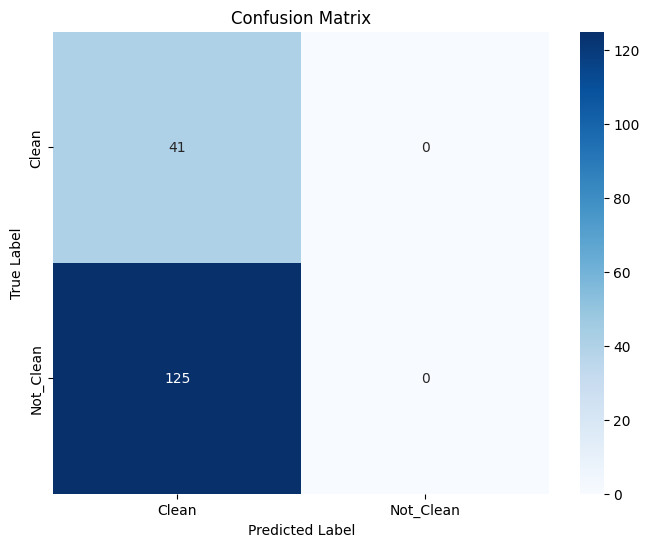

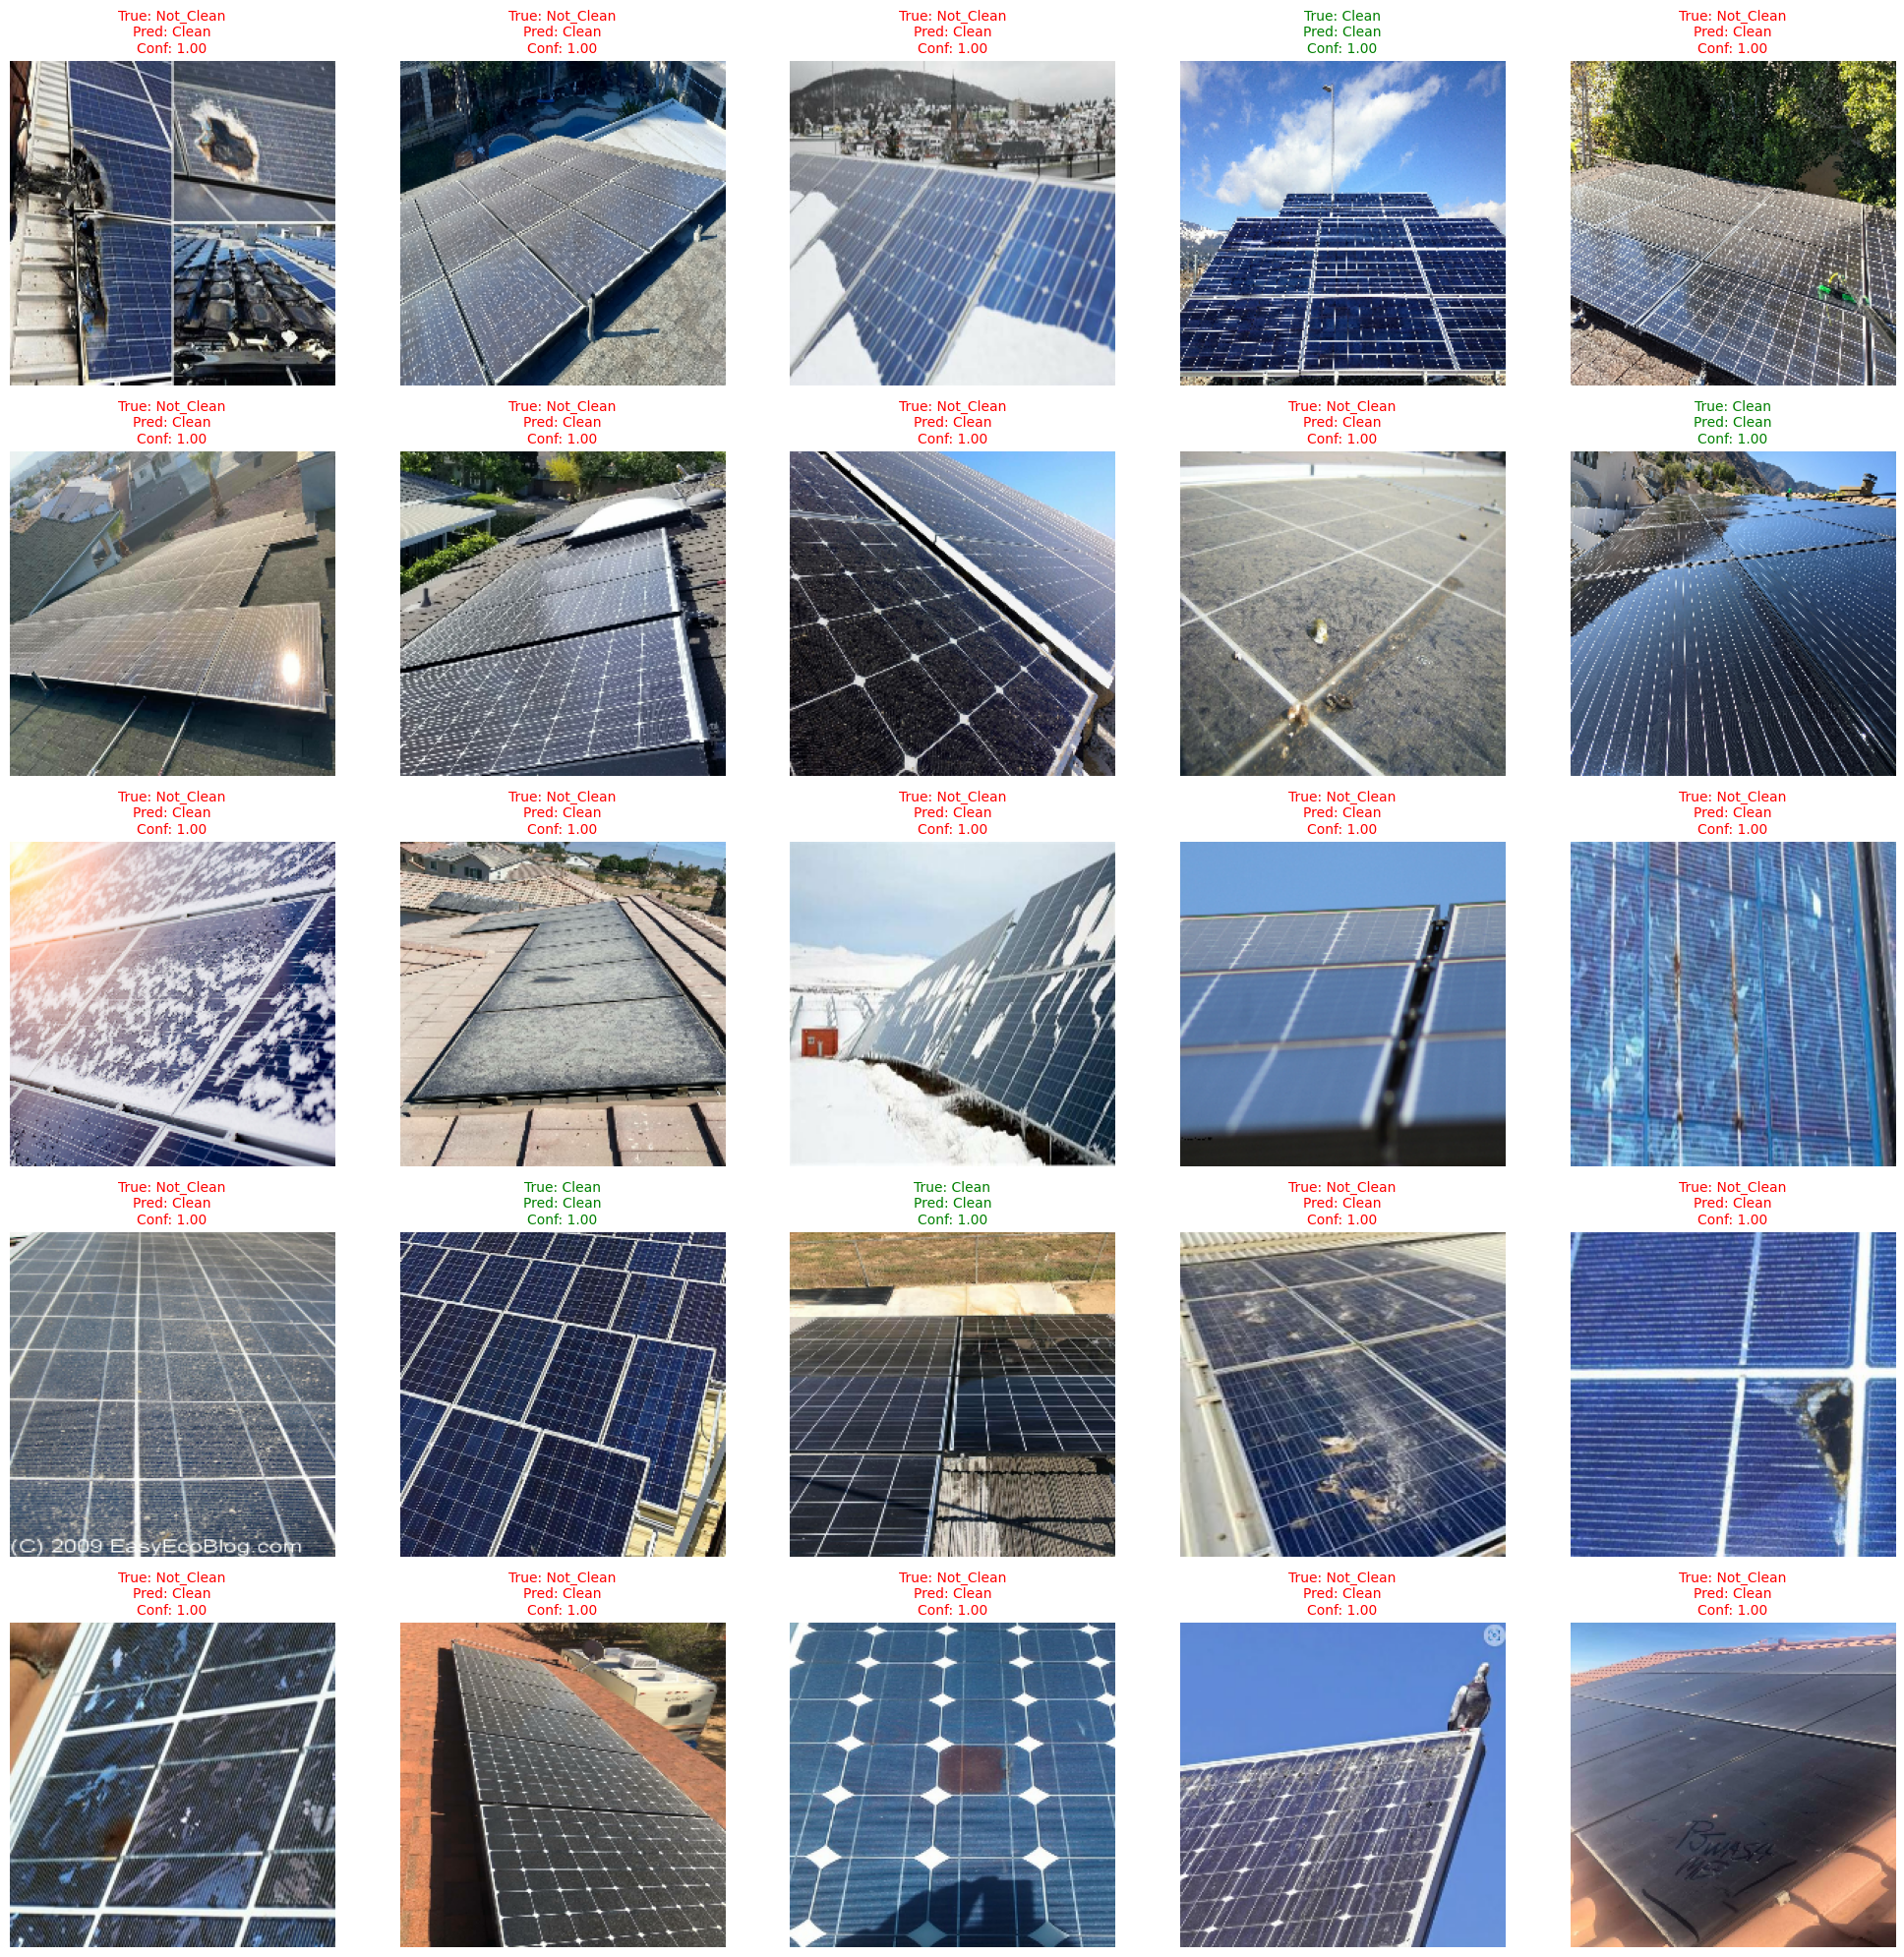

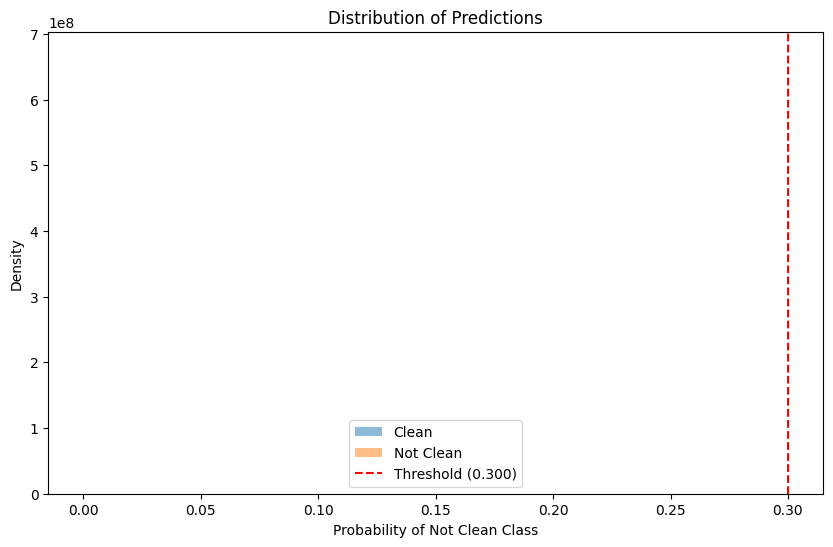

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

# Set image dimensions
img_height, img_width = 224, 224

# Load CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/binary_solar_panels/',
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/binary_solar_panels/',
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=32,
    seed=42
)

class_names = train_ds.class_names
print("Classes:", class_names)

# Calculate class weights
class_counts = np.zeros(2)
for _, labels in val_ds:
    for label in labels:
        class_counts[label.numpy()] += 1
total_samples = np.sum(class_counts)
class_weights = total_samples / (2 * class_counts)
print(f"\nClass distribution:")
print(f"Clean: {class_counts[0]} images")
print(f"Not Clean: {class_counts[1]} images")
print(f"\nClass weights:")
print(f"Clean: {class_weights[0]:.2f}")
print(f"Not Clean: {class_weights[1]:.2f}")

# Improved prompts with visual descriptions
text_descriptions = {
    "clean": [
        "a perfectly clean solar panel with pristine glass surface",
        "a brand new solar panel with crystal clear surface",
        "a spotless solar panel with mirror-like surface",
        "a professionally cleaned solar panel with perfect clarity",
        "a solar panel with completely clear glass"
    ],
    "not_clean": [
        "a solar panel covered with visible dirt and debris",
        "a damaged solar panel with visible defects",
        "a solar panel with bird droppings and contamination",
        "a solar panel with visible wear and damage",
        "a dirty and contaminated solar panel"
    ]
}

def predict_clip_with_confidence(image_batch, temperature=50.0):
    images = [Image.fromarray(img.numpy().astype("uint8")) for img in image_batch]

    # Process images
    image_inputs = processor(
        images=images,
        return_tensors="pt",
        padding=True
    )

    clean_scores = []
    not_clean_scores = []

    with torch.no_grad():
        image_features = model.get_image_features(**image_inputs)
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)

        # Process each prompt pair
        for clean_prompt, not_clean_prompt in zip(text_descriptions["clean"],
                                                text_descriptions["not_clean"]):
            text_inputs = processor(
                text=[clean_prompt, not_clean_prompt],
                return_tensors="pt",
                padding=True
            )

            text_features = model.get_text_features(**text_inputs)
            text_features = text_features / text_features.norm(dim=-1, keepdim=True)

            similarity = (temperature * image_features @ text_features.T)

            clean_scores.append(similarity[:, 0])
            not_clean_scores.append(similarity[:, 1])

    # Calculate final scores with class weights
    clean_scores = torch.stack(clean_scores).mean(dim=0) * class_weights[0]
    not_clean_scores = torch.stack(not_clean_scores).mean(dim=0) * class_weights[1]

    # Calculate probabilities
    scores = torch.stack([clean_scores, not_clean_scores], dim=1)
    probabilities = torch.softmax(scores, dim=1)

    return probabilities.numpy()

# Evaluate model
print("\nEvaluating model...")
y_true = []
y_pred_probs = []

for images, labels in val_ds:
    predictions = predict_clip_with_confidence(images)
    y_true.extend(labels.numpy())
    y_pred_probs.extend(predictions)

y_true = np.array(y_true)
y_pred_probs = np.array(y_pred_probs)

# Find best threshold
thresholds = np.arange(0.3, 0.7, 0.05)
best_f1 = 0
best_threshold = None

for threshold in thresholds:
    y_pred = (y_pred_probs[:, 1] > threshold).astype(int)
    f1 = f1_score(y_true, y_pred, average='weighted')
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nBest threshold: {best_threshold:.3f}")
y_pred = (y_pred_probs[:, 1] > best_threshold).astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks([0.5, 1.5], class_names)
plt.yticks([0.5, 1.5], class_names)
plt.show()

# Plot sample predictions
def plot_predictions(dataset, num_images=25):
    plt.figure(figsize=(20, 20))
    for images, labels in dataset.take(1):
        predictions = predict_clip_with_confidence(images)
        predicted_classes = (predictions[:, 1] > best_threshold).astype(int)

        for i in range(min(num_images, len(images))):
            ax = plt.subplot(5, 5, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            pred_class = class_names[predicted_classes[i]]
            true_class = class_names[labels[i]]
            prob = predictions[i][predicted_classes[i]]

            color = 'green' if pred_class == true_class else 'red'
            plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {prob:.2f}",
                     color=color, fontsize=10)
            plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot predictions
plot_predictions(val_ds)

# Plot probability distributions
plt.figure(figsize=(10, 6))
clean_probs = y_pred_probs[y_true == 0][:, 1]
not_clean_probs = y_pred_probs[y_true == 1][:, 1]

plt.hist(clean_probs, alpha=0.5, label='Clean', bins=20, density=True)
plt.hist(not_clean_probs, alpha=0.5, label='Not Clean', bins=20, density=True)
plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Threshold ({best_threshold:.3f})')
plt.xlabel('Probability of Not Clean Class')
plt.ylabel('Density')
plt.title('Distribution of Predictions')
plt.legend()
plt.show()
